# **MOFA | Multi-Omics Factor Analysis**

This MOFA analysis provides insights into the relationships between different omics
data types and identifies key factors and features that explain the variance across the
samples.

In [ ]:
# !pip install muon AnnData mofax mofapy2

In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from mofapy2 import *
from muon import *
import anndata as ad
import muon as mu
import mofax as mfx

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


In [ ]:
## LIPIDOMICS

lipid = pd.read_csv('/content/lipidomics.csv')
lipid = lipid.set_index('LipidID') # set index
lipid = lipid.fillna(0) # replace NaNs with 0

In [ ]:
## PROTEOMICS

prot = pd.read_csv('/content/proteomics.csv')
prot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4878 entries, 0 to 4877
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Protein.name  4878 non-null   object 
 1   HFpEF_11      4878 non-null   float64
 2   HFpEF_8       4878 non-null   float64
 3   HFpEF_1       4878 non-null   float64
 4   HFpEF_3       4878 non-null   float64
 5   HFpEF_6       4878 non-null   float64
dtypes: float64(5), object(1)
memory usage: 228.8+ KB


In [ ]:
# set index
prot = prot.set_index('Protein.name')
prot.head()

,HFpEF_11,HFpEF_8,HFpEF_1,HFpEF_3,HFpEF_6
Protein.name,,,,,
A0A087WV05,18.113565,18.105642,18.315362,18.695195,18.353172
A0A096LPI6,21.447813,21.562565,21.681084,21.648526,21.297472
A0A0B4J203,16.153868,15.934126,15.065362,15.952924,16.174013
A0A0G2JRQ6,17.887944,16.915221,17.161280,18.081226,16.308549
A0A0J9YY99,18.511344,17.968177,18.276035,19.090701,17.627409


In [ ]:
## PHOSPHOPROTEOMICS

phospho = phospho[['HFpEF_11', 'HFpEF_8', 'HFpEF_1', 'HFpEF_3', 'HFpEF_6']].copy()
phospho

,HFpEF_11,HFpEF_8,HFpEF_1,HFpEF_3,HFpEF_6
Site,,,,,
A2M_S603_M1,15.462205,17.985899,15.961170,17.037105,18.985370
AAAS_S371_M1,14.008024,14.008239,14.104418,14.153989,14.329930
AAK1_S1093_M1,11.560831,12.320832,11.710129,13.020071,12.658149
AAK1_S1095_M1,12.902770,12.158988,12.426941,14.725998,11.771403
AAK1_S1102_M1,11.140863,13.420912,13.461715,13.505646,12.832785
...,...,...,...,...,...
ZZEF1_S1518_M1,14.342968,15.014197,13.967869,14.233461,16.693463
ZZEF1_S2444_M1,13.111120,12.803479,13.166611,12.913501,12.967847
ZZEF1_T1477_M1,17.935690,17.682227,16.853652,17.473071,17.167205


In [ ]:

# creating 3 anndata obj and integrating them into one mudata object

proteomics_anndata = ad.AnnData(prot.T)
lipidomics_anndata = ad.AnnData(lipid.T)
phosphoproteomics_anndata = ad.AnnData(phospho.T)


/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [ ]:

# Create a dictionary of AnnData objects
mdata_dict = {
    "proteomics": proteomics_anndata,
    "lipidomics": lipidomics_anndata,
    "phosphoproteomics": phosphoproteomics_anndata
}

# Initialize MuData with the dictionary
mdata = MuData(mdata_dict)


/usr/local/lib/python3.10/dist-packages/mudata/_core/mudata.py:1454: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/usr/local/lib/python3.10/dist-packages/mudata/_core/mudata.py:856: UserWarning: var_names are not unique. To make them unique, call `.var_names_make_unique`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mudata/_core/mudata.py:1352: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("obs", axis=1, join_

In [ ]:

mdata

MuData object with n_obs × n_vars = 5 × 27432
  3 modalities
    proteomics:	5 x 4878
    lipidomics:	5 x 3172
    phosphoproteomics:	5 x 19382

In [ ]:


mu.tl.mofa(mdata, outfile="mofapy2.h5ad", n_factors=5)


        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        
Loaded view='proteomics' group='group1' with N=5 samples and D=4878 features...
Loaded view='lipidomics' group='group1' with N=5 samples and D=3172 features...
Loaded view='phosphoproteomics' group='group1' with N=5 samples and D=19382 features...



Model options:
- Automatic Relevance Determination prior on the factors: True
- Automatic Relevance Determination prior on the wei

In [ ]:
model = mfx.mofa_model("/content/mofapy2.h5ad")

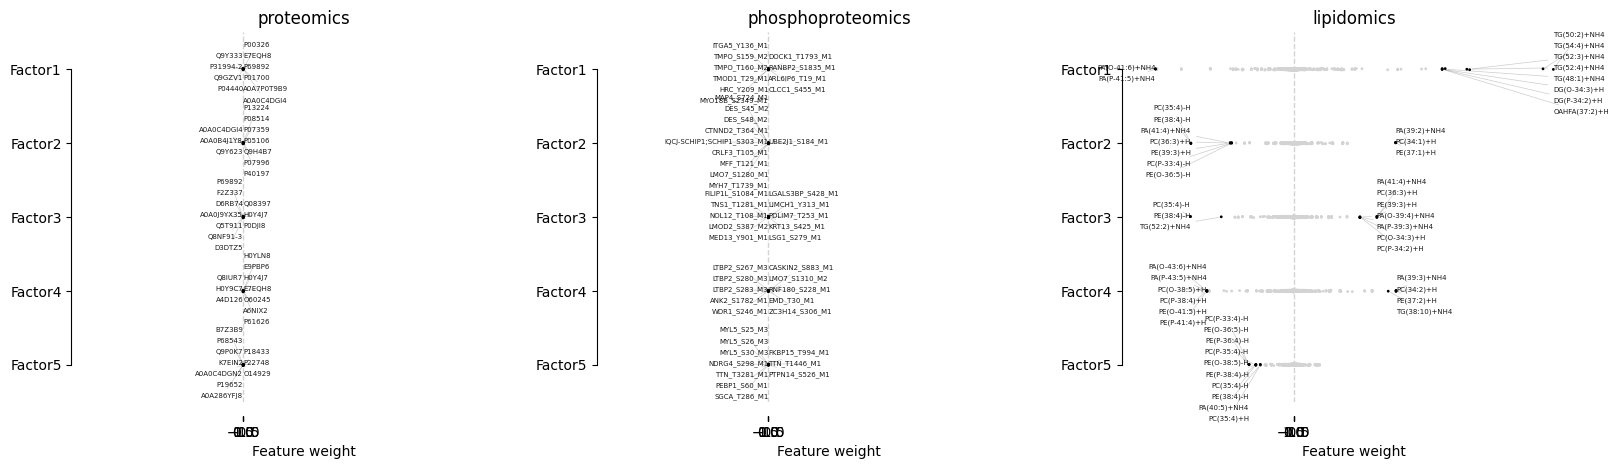

In [ ]:

ax = mfx.plot_weights(model, factor=2, n_features=10,
                      y_repel_coef=0.04, x_rank_offset=-150)

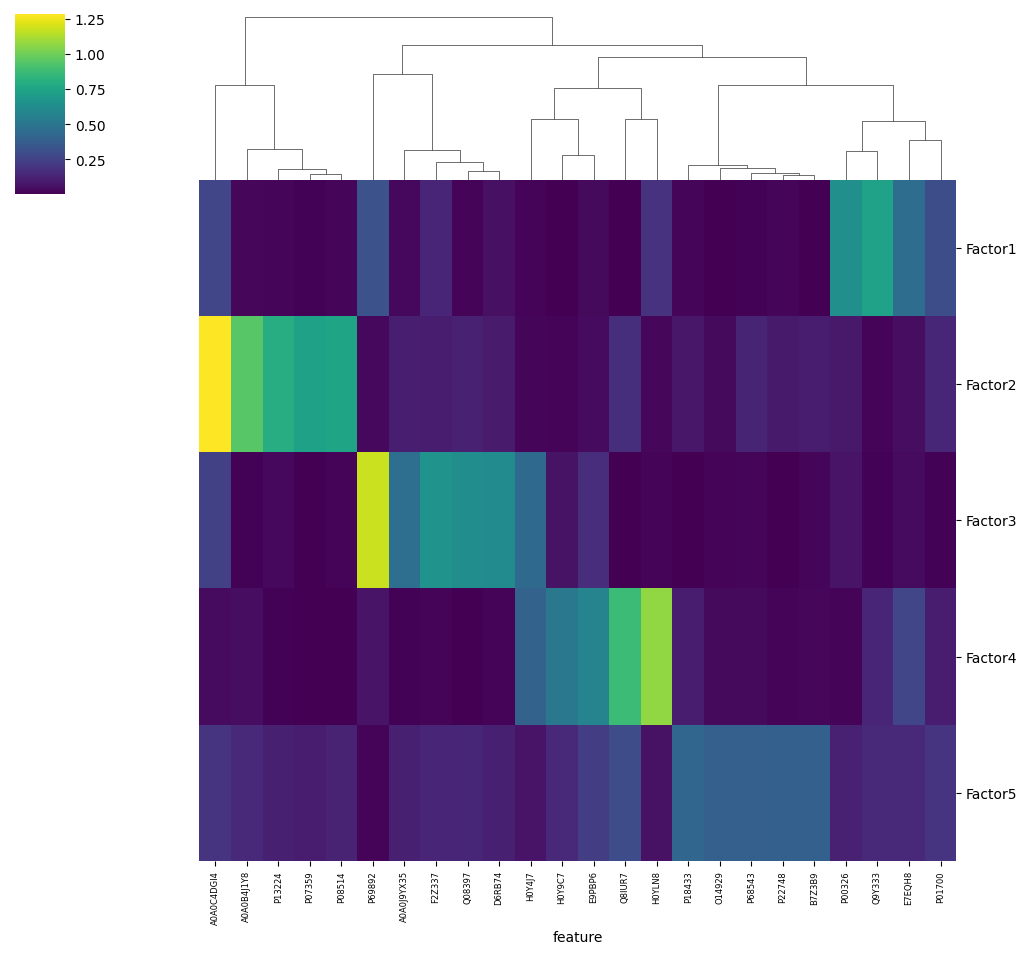

In [ ]:
mfx.plot_weights_heatmap(model, n_features=5,
                         factors=range(0, 5),
                         xticklabels_size=6, w_abs=True,
                         cmap="viridis", cluster_factors=False)

<Axes: title={'center': 'proteomics'}, xlabel='factor', ylabel='feature'>

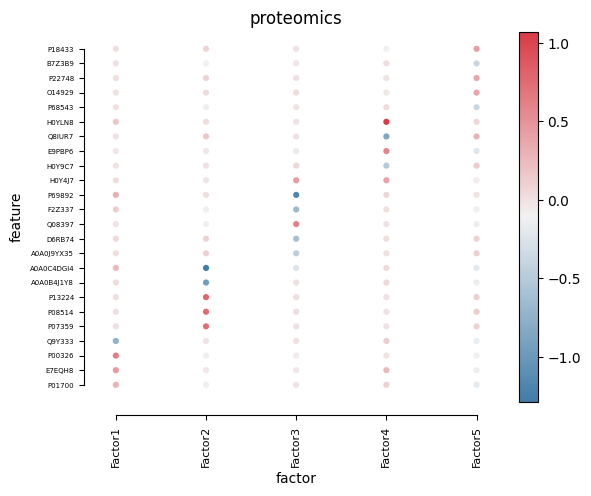

In [ ]:
mfx.plot_weights_dotplot(model)


In [ ]:
model.get_r2(3).sort_values("R2", ascending=False)


,Factor,View,Group,R2
10,Factor4,lipidomics,group1,18.938944
11,Factor4,phosphoproteomics,group1,14.679820
9,Factor4,proteomics,group1,8.080041


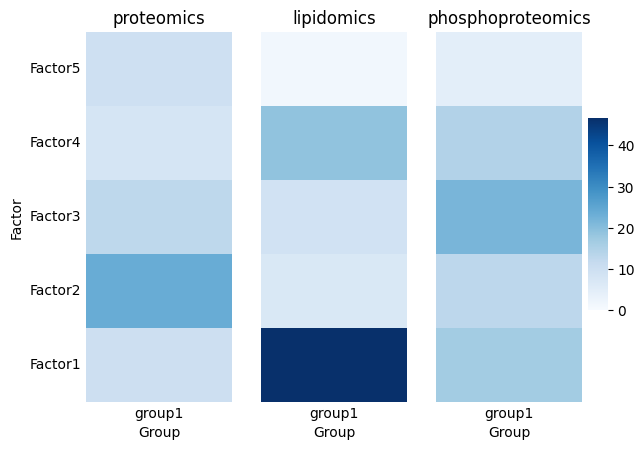

In [ ]:
mfx.plot_r2(model, factors=list(range(5)), cmap="Blues")


<Axes: >

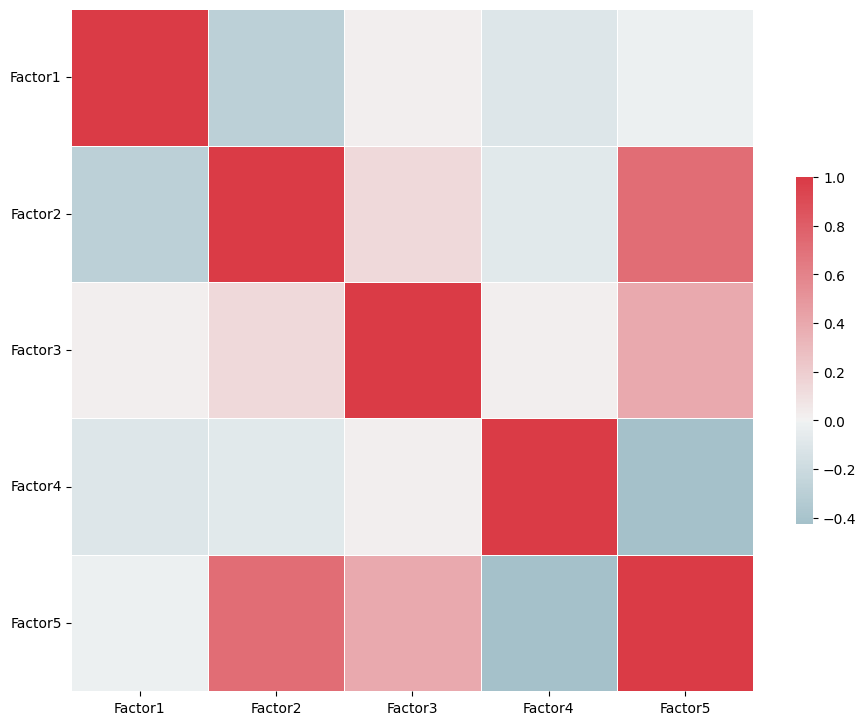

In [ ]:

mfx.plot_weights_correlation(model, factors=list(range(5)))

In [ ]:
variance_explained_df = pd.DataFrame(mfx.mofa_model.get_variance_explained(model))

In [ ]:
mofa_features_df = pd.DataFrame(mfx.mofa_model.get_features(model))

In [ ]:
variance_explained_df

,Factor,View,Group,R2
0,Factor1,proteomics,group1,10.185313
1,Factor1,lipidomics,group1,46.564318
2,Factor1,phosphoproteomics,group1,16.784940
3,Factor2,proteomics,group1,23.776308
4,Factor2,lipidomics,group1,7.065490
5,Factor2,phosphoproteomics,group1,12.936879
6,Factor3,proteomics,group1,12.739802
7,Factor3,lipidomics,group1,8.921560
8,Factor3,phosphoproteomics,group1,21.683354
9,Factor4,proteomics,group1,8.080041


In [ ]:
mofa_features_df

,view,feature
0,lipidomics,OAHFA(37:3)+H
1,lipidomics,WE(O-60:7)+Na
2,lipidomics,OAHFA(37:2)+H
3,lipidomics,OAHFA(37:2)-H
4,lipidomics,WE(O-25:1)+NH4
...,...,...
27427,proteomics,O95218
27428,proteomics,O43264
27429,proteomics,Q9C0D3
27430,proteomics,Q15942


In [ ]:
mofa_weights_df = pd.DataFrame(mfx.mofa_model.get_weights(model))

In [ ]:
mofa_weights_df

,0,1,2,3,4
0,-0.000474,0.001845,0.001224,0.012406,-0.027310
1,-0.000957,0.004598,-0.002954,0.001658,0.010690
2,0.007858,-0.039883,0.000169,-0.000964,-0.110814
3,0.040821,0.015627,-0.034443,0.023448,0.001419
4,0.014091,0.012950,-0.016873,0.030427,-0.011828
...,...,...,...,...,...
27427,-0.022215,-0.123738,0.084552,-0.014692,-0.102832
27428,0.001944,0.002836,0.001725,-0.000128,0.039079
27429,0.012554,-0.012371,-0.014904,-0.004574,-0.048838
27430,-0.227017,-0.002993,0.001822,0.001875,-0.051332


In [ ]:
mfx.mofa_model.get_variance_explained(model)

,Factor,View,Group,R2
0,Factor1,proteomics,group1,10.185313
1,Factor1,lipidomics,group1,46.564318
2,Factor1,phosphoproteomics,group1,16.784940
3,Factor2,proteomics,group1,23.776308
4,Factor2,lipidomics,group1,7.065490
5,Factor2,phosphoproteomics,group1,12.936879
6,Factor3,proteomics,group1,12.739802
7,Factor3,lipidomics,group1,8.921560
8,Factor3,phosphoproteomics,group1,21.683354
9,Factor4,proteomics,group1,8.080041


In [ ]:
mfx.mofa_model.get_views_contributions(model)

View,proteomics,lipidomics,phosphoproteomics
sample,,,
HFpEF_11,0.225833,0.485881,0.288286
HFpEF_8,0.312294,0.342607,0.345100
HFpEF_1,0.473739,0.225436,0.300825
HFpEF_3,0.341376,0.297788,0.360836
HFpEF_6,0.404957,0.216491,0.378551
